#Libraries and Google Drive mounting


In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/cleaned_fundamentalData2.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Creating new Horse recent form feature (Last 5 races)

In [ ]:
# Calculate horse_win_percentage
df['horse_win_percentage'] = df.groupby('horse_code')['position_official'].transform(lambda x: (x == 1).mean())

# Function to extract recent form (last 5 races)
def get_recent_form(x, n_races=5):
    recent_races = x.tail(n_races)
    form_string = ''.join([str(int(pos)) for pos in recent_races])  # Convert positions to integers
    return form_string

# Apply the function to create the horse_recent_form feature
df['horse_recent_form'] = (
    df.groupby('horse_code')['position_official']
    .transform(get_recent_form)
)

# Create features from horse_recent_form
df['avg_finishing_position_last_5'] = (
    df['horse_recent_form'].str[:5].apply(lambda x: sum([int(i) for i in x]) / len(x) if len(x) == 5 else None)
)
df['wins_last_5'] = df['horse_recent_form'].str[:5].apply(lambda x: x.count('1') if len(x) == 5 else None)

# Print the first few rows to check the new features
print(df[['horse_code', 'horse_win_percentage', 'horse_recent_form',
          'avg_finishing_position_last_5', 'wins_last_5']].head())

   horse_code  horse_win_percentage horse_recent_form  \
0      244684                   0.0                12   
1      245709                   0.0                 8   
2      253400                   0.0              1415   
3      251675                   0.0                00   
4      251675                   0.0                00   

   avg_finishing_position_last_5  wins_last_5  
0                            NaN          NaN  
1                            NaN          NaN  
2                            NaN          NaN  
3                            NaN          NaN  
4                            NaN          NaN  


#Graph Plotting and analysis
1. Win Percentage by Number of Runners
2. Win Percentage by Number of Fences Jumped
3. Finishing Position Distribution by Fences Jumped
4. Average Jockey Win Percentage Over Time (120-day Rolling Average)
5. Win Probability by Horse Gender and Race Type

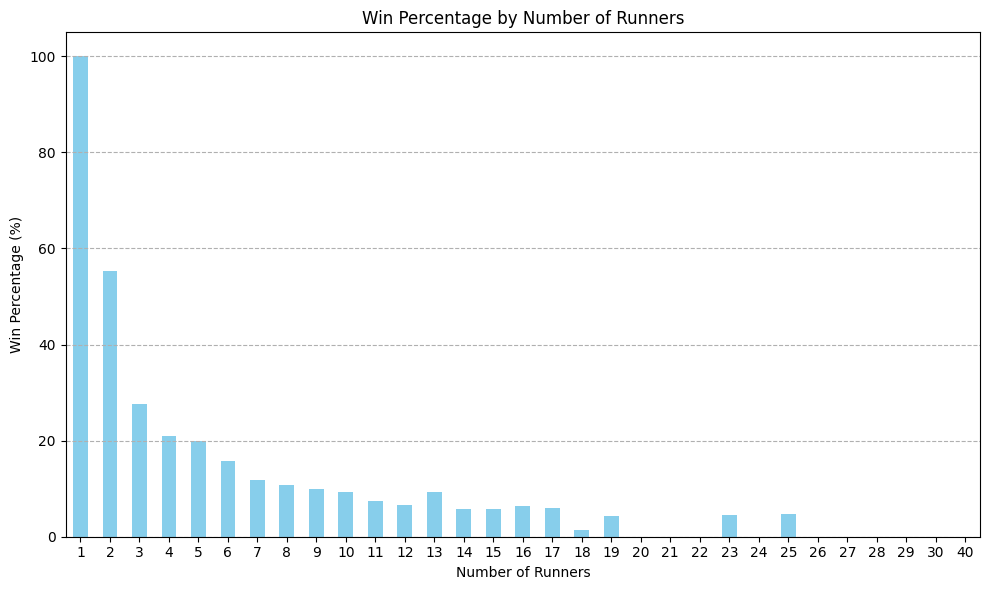

In [ ]:
# Group the data by 'number_of_runners' and calculate the win percentage for each group
win_percentage_by_runners = df.groupby('number_of_runners')['position_official'].apply(lambda x: (x == 1).mean() * 100)

# Create the bar plot
plt.figure(figsize=(10, 6))
win_percentage_by_runners.plot(kind='bar', color='skyblue')
plt.title('Win Percentage by Number of Runners')
plt.xlabel('Number of Runners')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

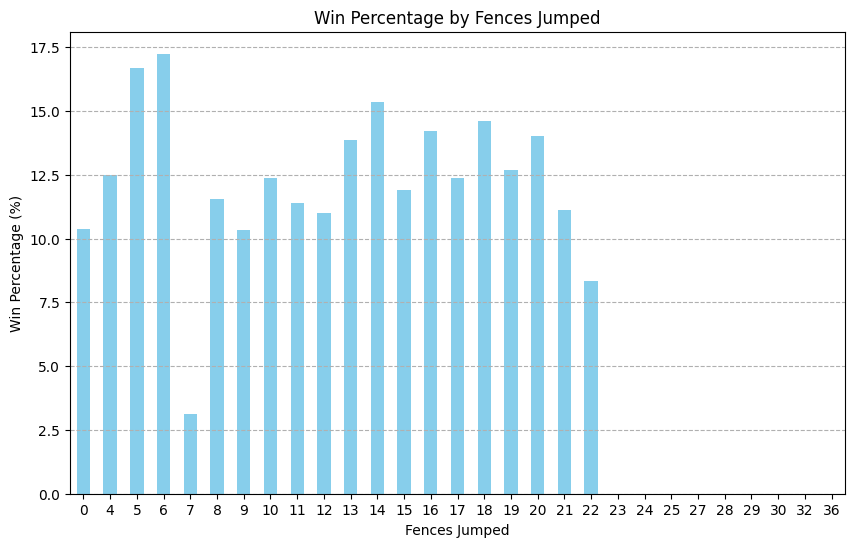

In [ ]:
win_percentage_by_fences = df.groupby('fences_jumped')['position_official'].apply(lambda x: (x == 1).mean() * 100)

plt.figure(figsize=(10, 6))
win_percentage_by_fences.plot(kind='bar', color='skyblue')
plt.title('Win Percentage by Fences Jumped')
plt.xlabel('Fences Jumped')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

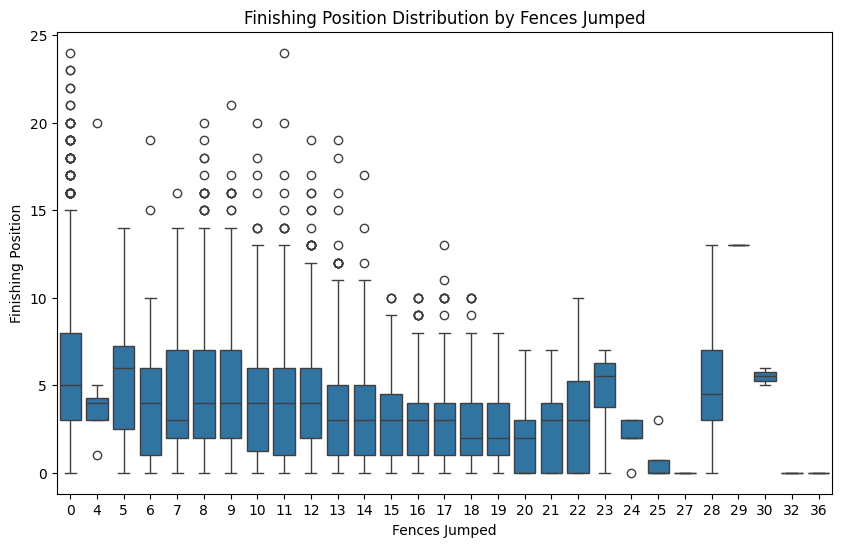

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fences_jumped', y='position_official', data=df)
plt.title('Finishing Position Distribution by Fences Jumped')
plt.xlabel('Fences Jumped')
plt.ylabel('Finishing Position')
plt.show()

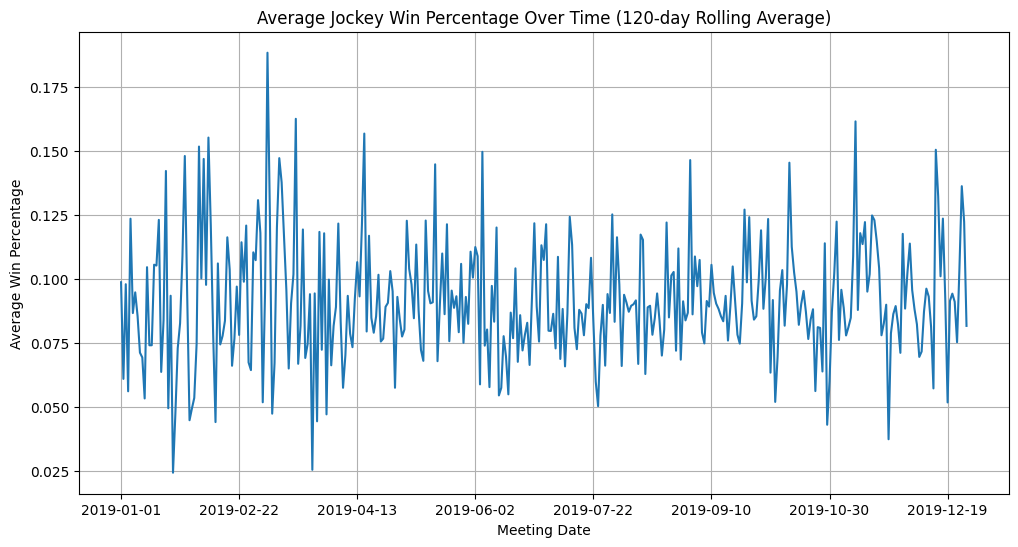

In [ ]:
# Calculate rolling win percentage for each jockey (example: 120-day window)
df['jockey_rolling_win_perc'] = (
    df.groupby('jockey_code')['position_official']
    .transform(lambda x: x.rolling(window=120, min_periods=1).apply(lambda y: (y == 1).mean()))
)

# Group by meeting_date and calculate the average rolling win percentage
avg_jockey_win_perc_by_date = df.groupby('meeting_date')['jockey_rolling_win_perc'].mean()

# Create the line graph
plt.figure(figsize=(12, 6))
avg_jockey_win_perc_by_date.plot()
plt.title('Average Jockey Win Percentage Over Time (120-day Rolling Average)')
plt.xlabel('Meeting Date')
plt.ylabel('Average Win Percentage')
plt.grid(True)
plt.show()

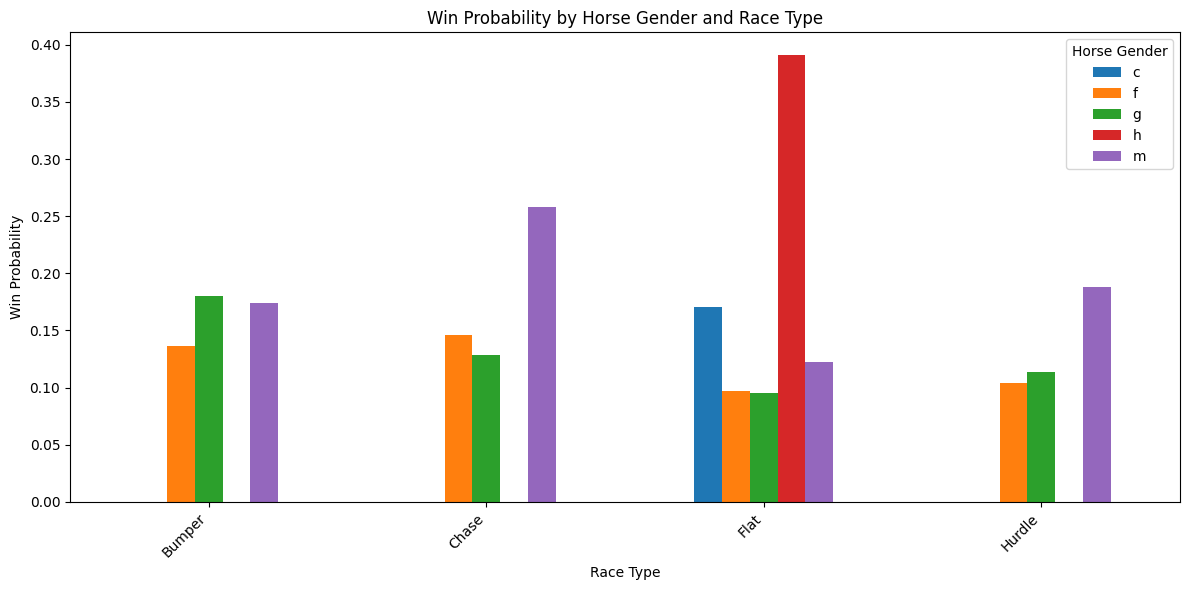

In [ ]:
# Group by 'race_type' and 'horse_gender', then calculate win probability
win_prob = (
    df.groupby(['race_type', 'horse_gender'])['position_official']
    .apply(lambda x: (x == 1).mean())
    .unstack()
)

# Plot the grouped bar chart
win_prob.plot(kind='bar', figsize=(12, 6))
plt.title('Win Probability by Horse Gender and Race Type')
plt.xlabel('Race Type')
plt.ylabel('Win Probability')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Horse Gender')
plt.tight_layout()
plt.show()